In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spotify_df = pd.read_csv('Downloads/Spotify most streamed.csv')

print("First few rows:")
display(spotify_df.head())
print("\nDataset Info:")
spotify_df.info()

#DATA CLEANING SECTION
# Check for missing values
print("\nChecking for missing values:")
print(spotify_df.isnull().sum())

print("\nBasic Statistics:")
print(spotify_df.describe())

# Split the 'Artist and Title' column into separate 'Artist' and 'Title' columns, handling cases with incorrect format
if 'Artist and Title' in spotify_df.columns:
    artist_title_split = spotify_df['Artist and Title'].str.split(' - ', n=1, expand=True)
    spotify_df['Artist'] = artist_title_split[0]
    spotify_df['Title'] = artist_title_split[1]
    
    # Remove rows where Title is NaN 
    spotify_df = spotify_df.dropna(subset=['Title'])
    
    # Reorder columns for clarity
    spotify_df = spotify_df[['Artist', 'Title', 'Streams', 'Daily']]

print("\nCleaned Data Preview:")
display(spotify_df.head())

First few rows:


,Artist and Title,Streams,Daily
0,The Weeknd - Blinding Lights,"3,783,983,806","1,736,378"
1,Ed Sheeran - Shape of You,"3,616,649,759","1,135,140"
2,Lewis Capaldi - Someone You Loved,"2,958,875,491","1,522,093"
3,Post Malone - Sunflower,"2,898,311,408","1,871,177"
4,Tones And I - Dance Monkey,"2,896,024,418","666,818"



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist and Title  2500 non-null   object
 1   Streams           2500 non-null   object
 2   Daily             2497 non-null   object
dtypes: object(3)
memory usage: 58.7+ KB

Checking for missing values:
Artist and Title    0
Streams             0
Daily               3
dtype: int64

Basic Statistics:
                 Artist and Title      Streams    Daily
count                        2500         2500     2497
unique                       2479         2496     2488
top     Ben E. King - Stand by Me  888,252,309  302,769
freq                            2            2        2

Cleaned Data Preview:


,Artist,Title,Streams,Daily
0,The Weeknd,Blinding Lights,"3,783,983,806","1,736,378"
1,Ed Sheeran,Shape of You,"3,616,649,759","1,135,140"
2,Lewis Capaldi,Someone You Loved,"2,958,875,491","1,522,093"
3,Post Malone,Sunflower,"2,898,311,408","1,871,177"
4,Tones And I,Dance Monkey,"2,896,024,418","666,818"


In [3]:
print(spotify_df.dtypes)

spotify_df['Streams'] = spotify_df['Streams'].astype(str)
spotify_df['Daily'] = spotify_df['Daily'].astype(str)

spotify_df['Streams'] = spotify_df['Streams'].replace(',', '', regex=True).astype(float)
spotify_df['Daily'] = spotify_df['Daily'].replace(',', '', regex=True).astype(float)

# Check for any remaining NaN values
print("Number of NaN values before cleaning:")
print(spotify_df.isna().sum())

spotify_df['Streams'].fillna(spotify_df['Streams'].median(), inplace=True)
spotify_df['Daily'].fillna(spotify_df['Daily'].median(), inplace=True)

print("\nNumber of NaN values after cleaning:")
print(spotify_df.isna().sum())


# Standardize the 'Streams' and 'Daily' columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(spotify_df[['Streams', 'Daily']])

# Calculate cosine similarity matrix for all songs
cosine_sim = cosine_similarity(scaled_features)

cosine_sim_df = pd.DataFrame(cosine_sim, index=spotify_df['Title'], columns=spotify_df['Title'])

query_songs = [
    "Blinding Lights",
    "Shape of You",
    "Someone You Loved"
]

def get_top_similar_songs(song_title, cosine_sim_df, top_n=10):
    if song_title in cosine_sim_df.columns:
        similar_indices = cosine_sim_df[song_title].nlargest(top_n + 1).index[1:]  # Skip the song itself
        return similar_indices.tolist()
    else:
        return []

for song in query_songs:
    print(f"Top 10 songs similar to '{song}':")
    print(get_top_similar_songs(song, cosine_sim_df), "\n")

Artist     object
Title      object
Streams    object
Daily      object
dtype: object
Number of NaN values before cleaning:
Artist     0
Title      0
Streams    0
Daily      2
dtype: int64

Number of NaN values after cleaning:
Artist     0
Title      0
Streams    0
Daily      0
dtype: int64
Top 10 songs similar to 'Blinding Lights':
['Arcade', 'Let Her Go', "If I Ain't Got You", 'Numb / Encore', 'No Me Conoce', 'Something Just Like This', 'Whatever It Takes', 'Time of Our Lives', 'Unforgettable', 'Too Good At Goodbyes'] 

Top 10 songs similar to 'Shape of You':
['Nothing Breaks Like a Heart', 'Yonaguni', 'bellyache', 'positions', '7 rings', 'INDUSTRY BABY', 'When We Were Young', 'Chandelier', 'Human', 'Into You'] 

Top 10 songs similar to 'Someone You Loved':
["There's Nothing Holdin' Me Back", 'Africa', 'MIDDLE CHILD', 'Animals', 'good 4 u', 'Stressed Out', 'Levitating', 'On Top Of The World', 'Bitter Sweet Symphony', 'We Are Young'] 



In [4]:
print(cosine_sim_df.head())

Title              Blinding Lights  Shape of You  Someone You Loved  \
Title                                                                 
Blinding Lights           1.000000      0.986269           0.998677   
Shape of You              0.986269      1.000000           0.976472   
Someone You Loved         0.998677      0.976472           1.000000   
Sunflower                 0.983153      0.939466           0.991251   
Dance Monkey              0.955633      0.991157           0.939221   

Title              Sunflower  Dance Monkey  One Dance  rockstar      STAY  \
Title                                                                       
Blinding Lights     0.983153      0.955633   0.997950  0.976478  0.996644   
Shape of You        0.939466      0.991157   0.973678  0.998678  0.969441   
Someone You Loved   0.991251      0.939221   0.999921  0.964098  0.999535   
Sunflower           1.000000      0.885692   0.992835  0.920615  0.994815   
Dance Monkey        0.885692      1.0000

Similarities for 'Blinding Lights':
Title
Blinding Lights       1.000000
Shape of You          0.986269
Someone You Loved     0.998677
Sunflower             0.983153
Dance Monkey          0.955633
                        ...   
Right Here Waiting   -0.995133
You Get Me So High   -0.662673
Bubble Gum           -0.981219
White Christmas      -0.019566
Angel                -0.993595
Name: Blinding Lights, Length: 2499, dtype: float64


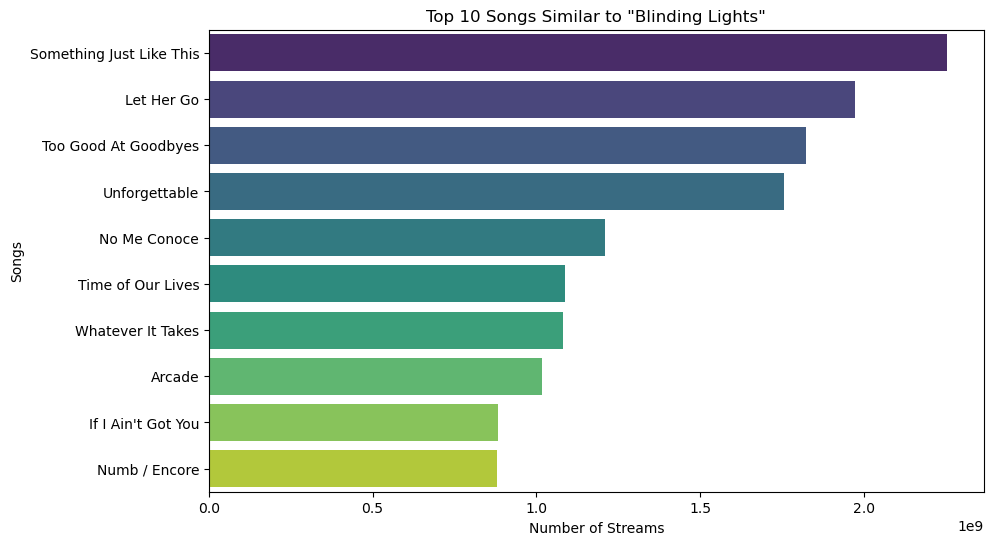

Similarities for 'Shape of You':
Title
Blinding Lights       0.986269
Shape of You          1.000000
Someone You Loved     0.976472
Sunflower             0.939466
Dance Monkey          0.991157
                        ...   
Right Here Waiting   -0.965196
You Get Me So High   -0.777254
Bubble Gum           -0.999602
White Christmas      -0.184413
Angel                -0.998613
Name: Shape of You, Length: 2499, dtype: float64


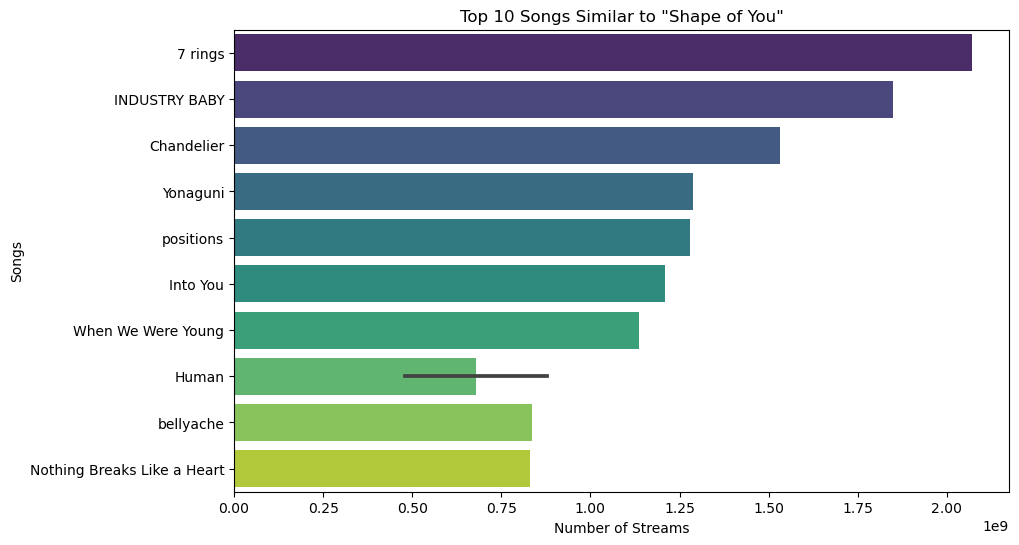

Similarities for 'Someone You Loved':
Title
Blinding Lights       0.998677
Shape of You          0.976472
Someone You Loved     1.000000
Sunflower             0.991251
Dance Monkey          0.939221
                        ...   
Right Here Waiting   -0.998884
You Get Me So High   -0.623285
Bubble Gum           -0.970002
White Christmas       0.031874
Angel                -0.986470
Name: Someone You Loved, Length: 2499, dtype: float64


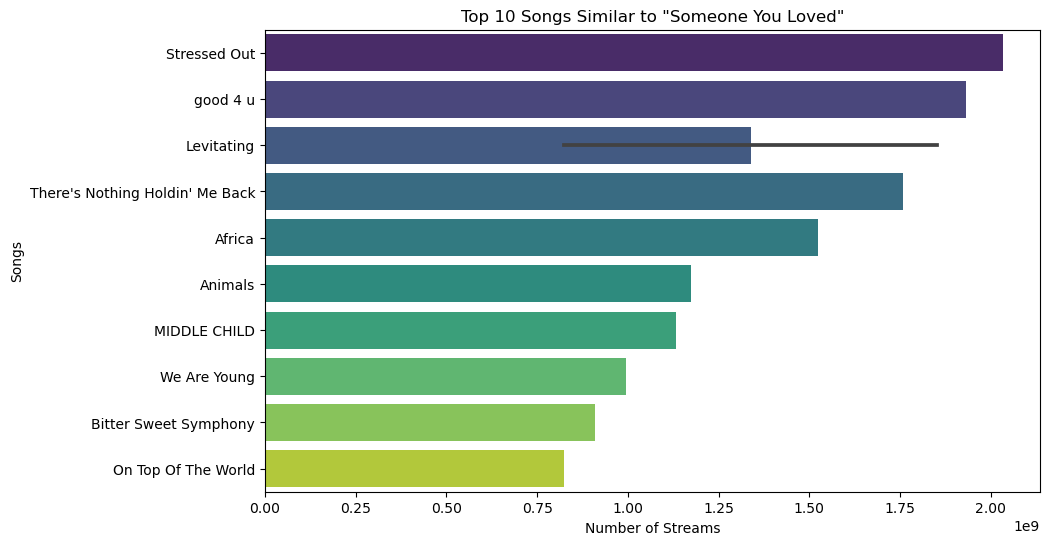

In [5]:
def get_top_similar_songs(song_title, cosine_sim_df, top_n=10):
    if song_title in cosine_sim_df.columns:
        print(f"Similarities for '{song_title}':")
        print(cosine_sim_df[song_title])  
        similar_indices = cosine_sim_df[song_title].nlargest(top_n + 1).index[1:]  
        return similar_indices.tolist()
    else:
        print(f"'{song_title}' not found in cosine similarity DataFrame.")
        return []

def plot_top_similar_songs(query_songs, cosine_sim_df, spotify_df):
    for song in query_songs:
        similar_songs = get_top_similar_songs(song, cosine_sim_df)
        if not similar_songs:
            print(f"No similar songs found for '{song}'.")
            continue

        similar_df = spotify_df[spotify_df['Title'].isin(similar_songs)][['Title', 'Streams']]   
        if similar_df.empty:
            print(f"Similar songs DataFrame is empty for '{song}'.")
            continue  

        similar_df['Streams'] = pd.to_numeric(similar_df['Streams'], errors='coerce')
        similar_df.dropna(subset=['Streams'], inplace=True)
        similar_df.set_index('Title', inplace=True)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=similar_df['Streams'], y=similar_df.index, palette='viridis')
        plt.title(f'Top 10 Songs Similar to "{song}"')
        plt.xlabel('Number of Streams')
        plt.ylabel('Songs')
        plt.show()


plot_top_similar_songs(query_songs, cosine_sim_df, spotify_df)